In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
import sklearn

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

data = pd.read_csv("train.csv")

data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [2]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [3]:
data['HouseYear'].describe()

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [4]:
data['HouseYear']=data['HouseYear'].apply(lambda x: data['HouseYear'].describe()['50%'] if x > 2020 else x)

In [5]:
data['HouseYear'].describe()

count    10000.000000
mean      1984.863800
std         18.409979
min       1910.000000
25%       1974.000000
50%       1977.000000
75%       2001.000000
max       2020.000000
Name: HouseYear, dtype: float64

In [6]:
data['DistrictId'] = data['DistrictId'].apply(str)

In [7]:
numeric_subset = data[['Id','Social_2', 'Healthcare_1', 'Helthcare_2', 'HouseYear','HouseFloor','Floor','KitchenSquare','LifeSquare','Square','Rooms', 'Shops_1', 'Ecology_1','Price']]
categorical_subset = data[['DistrictId', 'Ecology_2', 'Ecology_3','Shops_2']]
categorical_subset = pd.get_dummies(categorical_subset)

data = pd.concat([numeric_subset, categorical_subset], axis = 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data['Social_2'] = scaler.fit_transform(data[['Social_2']].astype(np.float64))
data['Healthcare_1'] = scaler.fit_transform(data[['Healthcare_1']].astype(np.float64))
data['Helthcare_2'] = scaler.fit_transform(data[['Helthcare_2']].astype(np.float64))

data['HouseYear'] = scaler.fit_transform(data[['HouseYear']].astype(np.float64))
data['HouseFloor'] = scaler.fit_transform(data[['HouseFloor']].astype(np.float64))
data['Floor'] = scaler.fit_transform(data[['Floor']].astype(np.float64))
data['KitchenSquare'] = scaler.fit_transform(data[['KitchenSquare']].astype(np.float64))
data['LifeSquare'] = scaler.fit_transform(data[['LifeSquare']].astype(np.float64))
data['Square'] = scaler.fit_transform(data[['Square']].astype(np.float64))
data['Rooms'] = scaler.fit_transform(data[['Rooms']].astype(np.float64))

data.head()

,Id,Social_2,Healthcare_1,Helthcare_2,HouseYear,HouseFloor,Floor,KitchenSquare,LifeSquare,Square,...,DistrictId_96,DistrictId_97,DistrictId_98,DistrictId_99,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,0.412794,NaN,0.000000,0.536364,0.076923,0.146341,0.002979,0.003887,0.073203,...,0,0,0,0,0,1,0,1,0,1
1,15053,0.536135,0.049495,0.166667,0.618182,0.076923,0.146341,0.003972,0.005305,0.100866,...,0,0,0,0,0,1,0,1,0,1
2,4765,0.401322,0.047226,0.166667,0.527273,0.102564,0.170732,0.000000,0.003854,0.068463,...,0,0,0,0,0,1,0,1,0,1
3,5809,0.294317,0.223551,0.000000,0.609091,0.145299,0.170732,0.004469,0.007000,0.081597,...,0,0,0,0,0,1,0,1,0,1
4,10783,0.296484,0.428542,0.333333,0.600000,0.102564,0.243902,0.003476,0.003129,0.060182,...,0,0,0,1,0,1,0,1,0,1


In [9]:
X_health = numeric_subset.loc[data['Healthcare_1'].notna()]
X_health.head()


,Id,Social_2,Healthcare_1,Helthcare_2,HouseYear,HouseFloor,Floor,KitchenSquare,LifeSquare,Square,Rooms,Shops_1,Ecology_1,Price
1,15053,10309,240.0,1,1978.0,9.0,7,8.0,40.049543,65.683640,3.0,16,0.000070,300009.450063
2,4765,7759,229.0,1,1968.0,12.0,8,0.0,29.197612,44.947953,2.0,3,0.049637,220925.908524
3,5809,5735,1084.0,0,1977.0,17.0,8,9.0,52.731512,53.352981,2.0,5,0.437885,175616.227217
4,10783,5776,2078.0,2,1976.0,12.0,11,7.0,23.776169,39.649192,1.0,4,0.012339,150226.531644
5,12915,7715,990.0,0,2011.0,17.0,5,12.0,46.683720,80.384479,3.0,6,0.309479,215898.447742


In [10]:
X_health1_NaN = numeric_subset.loc[data['Healthcare_1'].isna()]
X_health1_NaN.head()


,Id,Social_2,Healthcare_1,Helthcare_2,HouseYear,HouseFloor,Floor,KitchenSquare,LifeSquare,Square,Rooms,Shops_1,Ecology_1,Price
0,14038,7976,NaN,0,1969.0,9.0,7,6.0,29.442751,47.981561,2.0,11,0.089040,184966.930730
6,14549,4386,NaN,1,1960.0,5.0,3,7.0,37.160377,62.254114,2.0,5,0.460556,296021.204377
7,11993,1437,NaN,0,1977.0,0.0,14,0.0,NaN,80.312926,2.0,2,0.075779,221244.156664
8,5172,264,NaN,0,1977.0,17.0,9,1.0,NaN,64.511437,2.0,1,0.007122,229102.795999
9,8649,1437,NaN,0,2014.0,17.0,13,8.0,18.915552,46.461409,1.0,2,0.075779,95380.220993


In [11]:
X_health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5202 entries, 1 to 9999
Data columns (total 14 columns):
Id               5202 non-null int64
Social_2         5202 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      5202 non-null int64
HouseYear        5202 non-null float64
HouseFloor       5202 non-null float64
Floor            5202 non-null int64
KitchenSquare    5202 non-null float64
LifeSquare       4457 non-null float64
Square           5202 non-null float64
Rooms            5202 non-null float64
Shops_1          5202 non-null int64
Ecology_1        5202 non-null float64
Price            5202 non-null float64
dtypes: float64(9), int64(5)
memory usage: 609.6 KB


In [12]:
X_health["HouseYear"].describe()

count    5202.000000
mean     1982.275087
std        18.686061
min      1912.000000
25%      1969.000000
50%      1977.000000
75%      1996.000000
max      2020.000000
Name: HouseYear, dtype: float64

In [13]:
X_health["HouseYear"].max()

2020.0

In [14]:

X_health1 = X_health.drop(["Rooms", "Square", "LifeSquare", "KitchenSquare", "Floor"], axis=1)
X_health1.head()

,Id,Social_2,Healthcare_1,Helthcare_2,HouseYear,HouseFloor,Shops_1,Ecology_1,Price
1,15053,10309,240.0,1,1978.0,9.0,16,0.000070,300009.450063
2,4765,7759,229.0,1,1968.0,12.0,3,0.049637,220925.908524
3,5809,5735,1084.0,0,1977.0,17.0,5,0.437885,175616.227217
4,10783,5776,2078.0,2,1976.0,12.0,4,0.012339,150226.531644
5,12915,7715,990.0,0,2011.0,17.0,6,0.309479,215898.447742


In [15]:
X_health1['Helthcare_2'].unique()

array([1, 0, 2, 3, 5, 6, 4], dtype=int64)

In [16]:
yh = pd.DataFrame(X_health1['Healthcare_1'], columns=['Healthcare_1'])

yh.describe()

,Healthcare_1
count,5202.000000
mean,1142.904460
std,1021.517264
min,0.000000
25%,350.000000
50%,900.000000
75%,1548.000000
max,4849.000000


In [17]:
X_health1 = X_health1.drop(["Healthcare_1"], axis=1)


In [18]:
X_health1.head()

,Id,Social_2,Helthcare_2,HouseYear,HouseFloor,Shops_1,Ecology_1,Price
1,15053,10309,1,1978.0,9.0,16,0.000070,300009.450063
2,4765,7759,1,1968.0,12.0,3,0.049637,220925.908524
3,5809,5735,0,1977.0,17.0,5,0.437885,175616.227217
4,10783,5776,2,1976.0,12.0,4,0.012339,150226.531644
5,12915,7715,0,2011.0,17.0,6,0.309479,215898.447742


In [19]:

Xh_train, Xh_test, yh_train, yh_test = train_test_split(X_health1, yh, test_size=0.3, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(Xh_train, yh_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
lr.coef_


array([[ 5.41213888e-04, -4.40784070e-03,  1.12943626e+02,
        -9.93000239e+00, -4.83621426e+00,  2.96980625e+00,
         1.63554378e+02,  1.32311791e-03]])

In [22]:
lr.intercept_

array([20356.46882909])

In [23]:
yh_pred = lr.predict(Xh_test)
yh_pred.shape

(1561, 1)

In [24]:
initial_r2s = r2_score(yh_test, yh_pred)
initial_r2s

0.09695332744928464

In [25]:
X_health1_NaN_1 = X_health1_NaN.drop(["Healthcare_1", "Rooms", "Square", "LifeSquare", "KitchenSquare", "Floor"], axis=1)


In [26]:
X_health1_NaN_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4798 entries, 0 to 9997
Data columns (total 8 columns):
Id             4798 non-null int64
Social_2       4798 non-null int64
Helthcare_2    4798 non-null int64
HouseYear      4798 non-null float64
HouseFloor     4798 non-null float64
Shops_1        4798 non-null int64
Ecology_1      4798 non-null float64
Price          4798 non-null float64
dtypes: float64(4), int64(4)
memory usage: 337.4 KB


In [27]:
X_health1_NaN_1['Social_2'] = scaler.fit_transform(X_health1_NaN_1[['Social_2']].astype(np.float64))

X_health1_NaN_1.head()

,Id,Social_2,Helthcare_2,HouseYear,HouseFloor,Shops_1,Ecology_1,Price
0,14038,0.412794,0,1969.0,9.0,11,0.089040,184966.930730
6,14549,0.222998,1,1960.0,5.0,5,0.460556,296021.204377
7,11993,0.067090,0,1977.0,0.0,2,0.075779,221244.156664
8,5172,0.005075,0,1977.0,17.0,1,0.007122,229102.795999
9,8649,0.067090,0,2014.0,17.0,2,0.075779,95380.220993


In [28]:

yh_pred_NaN = lr.predict(X_health1_NaN_1)

yh_pred_NaN.shape


(4798, 1)

In [29]:
X_health1_NaN_1['Id'].head()

0    14038
6    14549
7    11993
8     5172
9     8649
Name: Id, dtype: int64

In [30]:
data_NaN = data.loc[data['Healthcare_1'].isna()]
data_NN = data.loc[data['Healthcare_1'].notna()]


data_NaN_t = data_NaN.drop(["Healthcare_1"], axis=1)
data_NaN_t.insert(1, "Healthcare_1", yh_pred_NaN)

data_NaN_t['Healthcare_1'] = scaler.fit_transform(data_NaN_t[['Healthcare_1']].astype(np.float64))


data_NaN_t.head()


,Id,Healthcare_1,Social_2,Helthcare_2,HouseYear,HouseFloor,Floor,KitchenSquare,LifeSquare,Square,...,DistrictId_96,DistrictId_97,DistrictId_98,DistrictId_99,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,0.352042,0.412794,0.000000,0.536364,0.076923,0.146341,0.002979,0.003887,0.073203,...,0,0,0,0,0,1,0,1,0,1
6,14549,0.549692,0.222998,0.166667,0.454545,0.042735,0.048780,0.003476,0.004918,0.095506,...,0,0,0,0,0,1,0,1,0,1
7,11993,0.343442,0.067090,0.000000,0.609091,0.000000,0.317073,0.000000,NaN,0.123726,...,0,0,0,0,0,1,0,1,0,1
8,5172,0.300387,0.005075,0.000000,0.609091,0.145299,0.195122,0.000497,NaN,0.099034,...,0,0,0,0,0,1,0,1,0,1
9,8649,0.046851,0.067090,0.000000,0.945455,0.145299,0.292683,0.003972,0.002479,0.070828,...,0,0,0,0,0,1,0,1,0,1


In [31]:
ndata = pd.concat([data_NN, data_NaN_t],sort=False)

ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 9997
Columns: 225 entries, Id to Shops_2_B
dtypes: float64(12), int64(2), uint8(211)
memory usage: 3.2 MB


In [32]:
ndata['LifeSquare'].unique()

array([0.00530451, 0.00385376, 0.00699991, ..., 0.00655254, 0.00648757,
       0.00269626])

In [33]:
ndata['LifeSquare'].describe()

count    7887.000000
mean        0.004924
std         0.011529
min         0.000000
25%         0.002994
50%         0.004333
75%         0.005984
max         1.000000
Name: LifeSquare, dtype: float64

In [34]:
data_ls_NaN = ndata.loc[ndata['LifeSquare'].isna()]
data_ls = ndata.loc[ndata['LifeSquare'].notna()]

y_ls = pd.DataFrame(data_ls['LifeSquare'], columns=['LifeSquare'])

In [35]:
data_ls_NaN_t = data_ls_NaN[['Square', 'HouseYear']].copy()
data_ls_t = data_ls[['Square', 'HouseYear']].copy()

In [36]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(data_ls_t, y_ls, test_size=0.3, random_state=42)

In [37]:
lr.fit(Xl_train, yl_train)
yl_pred = lr.predict(Xl_test)
yl_pred.shape

(2367, 1)

In [38]:
initial_r2s = r2_score(yl_test, yl_pred)
initial_r2s

0.018209490548565244

In [39]:
data_ls_NaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 23 to 9997
Columns: 225 entries, Id to Shops_2_B
dtypes: float64(12), int64(2), uint8(211)
memory usage: 683.0 KB


In [40]:
data_ls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7887 entries, 1 to 9996
Columns: 225 entries, Id to Shops_2_B
dtypes: float64(12), int64(2), uint8(211)
memory usage: 2.5 MB


In [41]:
yl_pred = lr.predict(data_ls_NaN_t)

In [42]:
data_ls_NaN_t = data_ls_NaN.drop(["LifeSquare"], axis=1)
data_ls_NaN_t.insert(1, "LifeSquare", yl_pred)

ndata = pd.concat([data_ls, data_ls_NaN_t],sort=False)

ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 9997
Columns: 225 entries, Id to Shops_2_B
dtypes: float64(12), int64(2), uint8(211)
memory usage: 3.2 MB


In [43]:
ndata.head()

,Id,Social_2,Healthcare_1,Helthcare_2,HouseYear,HouseFloor,Floor,KitchenSquare,LifeSquare,Square,...,DistrictId_96,DistrictId_97,DistrictId_98,DistrictId_99,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
1,15053,0.536135,0.049495,0.166667,0.618182,0.076923,0.146341,0.003972,0.005305,0.100866,...,0,0,0,0,0,1,0,1,0,1
2,4765,0.401322,0.047226,0.166667,0.527273,0.102564,0.170732,0.000000,0.003854,0.068463,...,0,0,0,0,0,1,0,1,0,1
3,5809,0.294317,0.223551,0.000000,0.609091,0.145299,0.170732,0.004469,0.007000,0.081597,...,0,0,0,0,0,1,0,1,0,1
4,10783,0.296484,0.428542,0.333333,0.600000,0.102564,0.243902,0.003476,0.003129,0.060182,...,0,0,0,1,0,1,0,1,0,1
5,12915,0.398996,0.204166,0.000000,0.918182,0.145299,0.097561,0.005958,0.006191,0.123838,...,0,0,0,0,0,1,0,1,0,1


In [45]:
y_p = pd.DataFrame(ndata['Price'], columns=['Price'])

In [47]:
X_p = ndata.drop(['Price'], axis=1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, test_size=0.3, random_state=42)

In [49]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
y_pred = lr.predict(X_test)

In [52]:
initial_r2s = r2_score(y_test, y_pred)
initial_r2s

0.08013164670150974

In [53]:
initial_mse = mean_squared_error(y_test, y_pred)
initial_mse

8016924797.014695

In [99]:
pr = pd.DataFrame(X_train.columns)
pr.insert(1, "w", lr.coef_.reshape(-1,1))

pr.loc[pr['w'].idxmax()]

0    KitchenSquare
w      1.13606e+06
Name: 7, dtype: object

In [100]:
pr.loc[pr['w'].idxmin()]

0     LifeSquare
w   -3.40047e+06
Name: 8, dtype: object

In [101]:
lr.coef_.flatten().max()

1136062.3898786847

In [102]:
lr.coef_.flatten().min()

-3400474.7200804823

In [103]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'Признак')

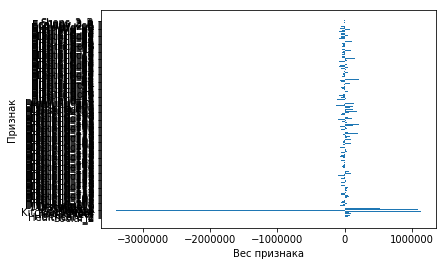

In [104]:
plt.barh(X_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [105]:
X_p = ndata.drop(['KitchenSquare', 'LifeSquare'], axis=1)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, test_size=0.3, random_state=42)

In [107]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
y_pred = lr.predict(X_test)

In [109]:
initial_r2s = r2_score(y_test, y_pred)
initial_r2s

1.0

In [110]:
initial_mse = mean_squared_error(y_test, y_pred)
initial_mse

6.470804591228362e-13

In [111]:
lr.coef_.flatten().max()

0.9999999999999998

In [112]:
lr.coef_.flatten().min()

-2.54378791181278e-05

In [117]:
X_train.head()

,Id,Social_2,Healthcare_1,Helthcare_2,HouseYear,HouseFloor,Floor,Square,Rooms,Shops_1,...,DistrictId_96,DistrictId_97,DistrictId_98,DistrictId_99,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
3224,9945,0.024372,0.300879,0.000000,0.609091,0.000000,0.146341,0.084609,0.105263,0,...,0,0,0,0,0,1,0,1,1,0
5878,11017,0.337827,0.319241,0.500000,0.445455,0.025641,0.146341,0.084916,0.157895,2,...,0,0,0,0,1,0,0,1,0,1
9555,13949,0.316204,0.299589,0.000000,0.590909,0.136752,0.219512,0.063696,0.052632,0,...,0,0,0,0,0,1,0,1,0,1
3554,16583,0.073804,0.111363,0.000000,0.609091,0.145299,0.073171,0.059453,0.052632,0,...,0,0,0,0,0,1,0,1,0,1
1631,10722,0.294105,0.287879,0.166667,0.727273,0.119658,0.292683,0.060408,0.052632,0,...,0,0,0,0,0,1,0,1,0,1


In [124]:
data_t = pd.read_csv("test.csv")

data_t['DistrictId'] = data_t['DistrictId'].apply(str)

In [125]:
numeric_subset = data_t[['Id','Social_2', 'Healthcare_1', 'Helthcare_2', 'HouseYear','HouseFloor','Floor','KitchenSquare','LifeSquare','Square','Rooms', 'Shops_1', 'Ecology_1']]
categorical_subset = data_t[['DistrictId', 'Ecology_2', 'Ecology_3','Shops_2']]
categorical_subset = pd.get_dummies(categorical_subset)

data_t = pd.concat([numeric_subset, categorical_subset], axis = 1)

In [126]:
data_t['Social_2'] = scaler.fit_transform(data_t[['Social_2']].astype(np.float64))
data_t['Healthcare_1'] = scaler.fit_transform(data_t[['Healthcare_1']].astype(np.float64))
data_t['Helthcare_2'] = scaler.fit_transform(data_t[['Helthcare_2']].astype(np.float64))

data_t['HouseYear'] = scaler.fit_transform(data_t[['HouseYear']].astype(np.float64))
data_t['HouseFloor'] = scaler.fit_transform(data_t[['HouseFloor']].astype(np.float64))
data_t['Floor'] = scaler.fit_transform(data_t[['Floor']].astype(np.float64))
data_t['KitchenSquare'] = scaler.fit_transform(data_t[['KitchenSquare']].astype(np.float64))
data_t['LifeSquare'] = scaler.fit_transform(data_t[['LifeSquare']].astype(np.float64))
data_t['Square'] = scaler.fit_transform(data_t[['Square']].astype(np.float64))
data_t['Rooms'] = scaler.fit_transform(data_t[['Rooms']].astype(np.float64))

data_t = data_t.drop(['KitchenSquare', 'LifeSquare'], axis=1)


In [127]:
data_t.head()

,Id,Social_2,Healthcare_1,Helthcare_2,HouseYear,HouseFloor,Floor,Square,Rooms,Shops_1,...,DistrictId_96,DistrictId_97,DistrictId_98,DistrictId_99,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,0.136400,NaN,0.000000,0.571429,0.141414,0.064935,0.218413,0.117647,0,...,0,0,0,0,0,1,0,1,0,1
1,15856,0.067090,NaN,0.000000,0.616071,0.010101,0.064935,0.305683,0.117647,2,...,0,0,0,0,0,1,0,1,0,1
2,5480,0.389638,0.969684,0.833333,0.008929,0.050505,0.012987,0.055023,0.058824,5,...,0,0,0,0,0,1,0,1,0,1
3,15664,0.233413,NaN,0.500000,0.883929,0.222222,0.272727,0.322720,0.117647,3,...,0,0,0,0,0,1,0,1,0,1
4,14275,0.024372,NaN,0.000000,0.973214,0.171717,0.207792,0.207806,0.058824,0,...,0,0,0,0,0,1,0,1,1,0


In [128]:
y_t_pred = lr.predict(data_t)

y_t_pred.shape

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
df = pd.DataFrame(y_pred)
df.to_csv('Osipov_predictions.csv',index=True)